<a href="https://colab.research.google.com/github/Nadeem-Anwar/Nadeem-Anwar/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Folders to store benign and malignant images separately
import os

source = '/content/drive/MyDrive/BreaKHis_v1/histology_slides/breast'
destination = '/content/sample_data'

try:
  os.mkdir(destination + '/BreaKHis_v1')
  os.mkdir(destination + '/BreaKHis_v1/benign')         #all benign images
  os.mkdir(destination + '/BreaKHis_v1/malignant')      #all malignant images
except FileExistsError:
  print('Destination folders already exist')

In [3]:
import cv2
from matplotlib import pyplot

benignList = []
benignName = []
malignantList = []
malignantName = []
bCount = 0
mCount = 0
flag = 0

os.chdir(source)
for d in os.listdir():      #to access either of benign or malignant
  if d == 'benign':
    os.chdir(d)
    data = benignList
    name = benignName
    flag = 0
  elif d == 'malignant':
    os.chdir(d)
    data = malignantList
    name = malignantName
    flag = 1
  else:
    continue

  for dd in os.listdir():      #to access SOB folder 
    if dd == 'SOB':
      os.chdir(dd)
      os.getcwd()
    else:
      continue

    for typeDir in os.listdir(): #to access various type sample folder
      os.chdir(typeDir)

      for patientDir in os.listdir():#to access each of patient directories
        os.chdir(patientDir)

        for x in os.listdir():        #to access 400X images only
          if x == '400X':
            os.chdir(x)
            print('******READING  ', os.getcwd() , '******')

            for f in os.listdir():      #to read each image
              file = os.getcwd() + '/' + f
              im = cv2.imread(file)
              data.append(im)
              name.append(f)
              if flag == 0:
                bCount = bCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/benign/' + f, im)
              elif flag == 1:
                mCount = mCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/malignant/' + f, im)

            os.chdir(os.pardir)
            break
          else:
            continue
          os.chdir(os.pardir)
          #break   #to be removed later, breaks are used to play with small sample
        os.chdir(os.pardir)
        #break   #to be removed later
      os.chdir(os.pardir)
      #break   #to be removed later
    os.chdir(os.pardir)
  os.chdir(os.pardir)

print('Images found :\nbenign    = ' + str(bCount), '\nmalignant = ' + str(mCount))

****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/400X has now be

In [4]:
# To split data into train and test set
from sklearn.model_selection import train_test_split
Bx_train, Bx_test, Bname_train, Bname_test = train_test_split(benignList, benignName, test_size = 0.2, random_state = 1)
Mx_train, Mx_test, Mname_train, Mname_test = train_test_split(malignantList, malignantName, test_size = 0.2, random_state = 1)

In [5]:
# Folders for train test splitted data
try:
  os.mkdir(destination + '/BreaKHis_v1/train')
  os.mkdir(destination + '/BreaKHis_v1/train/benign')
  os.mkdir(destination + '/BreaKHis_v1/train/malignant')
  os.mkdir(destination + '/BreaKHis_v1/test')
  os.mkdir(destination + '/BreaKHis_v1/test/benign')
  os.mkdir(destination + '/BreaKHis_v1/test/malignant')
except FileExistsError:
  print('Destination folders already exist')

In [6]:
#To write/save images in given folder path
def imgSave(images, name, path):
  i = 0
  for img in images:
    pyplot.imsave(path + name[i], img, cmap='gray')
    i = i + 1
  return i

Bx_trainCount = imgSave(Bx_train, Bname_train, destination + '/BreaKHis_v1/train/benign/')
Mx_trainCount = imgSave(Mx_train, Mname_train, destination + '/BreaKHis_v1/train/malignant/')
Bx_testCount = imgSave(Bx_test, Bname_test, destination + '/BreaKHis_v1/test/benign/')
Mx_testCount = imgSave(Mx_test, Mname_test, destination + '/BreaKHis_v1/test/malignant/')

print('TRAIN set: benign = ' + str(Bx_trainCount), ', malignant = ' + str(Mx_trainCount))
print('TEST  set: benign = ' + str(Bx_testCount),  ', malignant = ' + str(Mx_testCount))

TRAIN set: benign = 470 , malignant = 992
TEST  set: benign = 118 , malignant = 248


In [7]:
#label set for each of train test set
By_train = [0 for i in range(Bx_trainCount)]
By_test = [0 for i in range(Bx_testCount)]

My_train = [0 for i in range(Mx_trainCount)]
My_test = [0 for i in range(Mx_testCount)]

In [8]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
from sklearn.preprocessing import binarize
im = 0
def binarise(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
  return thresh_hold

def hist_equalise(list, count, list_pre):
  x_list_eq = []
  for img in list:
    imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r_image, g_image, b_image = cv2.split(imgc)

    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)

    imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val = None
    list_pre.append(binarise(imgc_eq))

Bx_train_pre = []
Bx_test_pre = []
Mx_train_pre = []
Mx_test_pre = []

hist_equalise(Bx_train, Bx_trainCount, Bx_train_pre)
hist_equalise(Bx_test,  Bx_testCount,  Bx_test_pre)
hist_equalise(Mx_train, Mx_trainCount, Mx_train_pre)
hist_equalise(Mx_test,  Mx_testCount,  Mx_test_pre)

In [9]:
#from scipy.misc import imread, imsave
img  = Mx_train_pre[10]
binarized = 1.0*(img>150)

pyplot.imsave(destination + '/BreaKHis_v1/demo.png', binarized)

In [10]:
from math import fabs
import cv2
import numpy as np
# Find the GLCM
import skimage.feature as feature

def findFeature(dataList, dataFile):
  fAppend = open(destination + '/BreaKHis_v1/' + dataFile, 'a')
  for gray in dataList:
    # Param:
    # source image
    # List of pixel pair distance offsets - here 1 in each direction
    # List of pixel pair angles in radians
    graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # Find the GLCM properties
    contrast = feature.greycoprops(graycom, 'contrast')
    dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
    homogeneity = feature.greycoprops(graycom, 'homogeneity')
    energy = feature.greycoprops(graycom, 'energy')
    correlation = feature.greycoprops(graycom, 'correlation')
    ASM = feature.greycoprops(graycom, 'ASM')

    features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM), axis=0)
    fAppend.write(str(features) +'\n')

  fAppend.close()

findFeature(Bx_train_pre, 'Bx_train_pre.txt')
findFeature(Bx_test_pre,  'Bx_test_pre.txt')
findFeature(Mx_train_pre, 'Mx_train_pre.txt')
findFeature(Mx_test_pre,  'Mx_test_pre.txt')

In [33]:
import cv2
from google.colab.patches import cv2_imshow

class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

#image = cv2.imread(image_file)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]
desc = LocalBinaryPatterns(24, 8)
hist, lbp = desc.describe(gray)
print("Histogram of Local Binary Pattern value: {}".format(hist))

contrast = contrast.flatten()
dissimilarity = dissimilarity.flatten()
homogeneity = homogeneity.flatten()
energy = energy.flatten()
correlation = correlation.flatten()
ASM = ASM.flatten()
hist = hist.flatten()

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM, hist), axis=0)
#pyplot.imshow(gray)
pyplot.imshow(lbp)

Histogram of Local Binary Pattern value: [3.32608696e-02 2.21366460e-02 4.41925466e-03 1.76397516e-03
 1.00000000e-03 5.99378882e-04 4.87577640e-04 3.66459627e-04
 3.69565217e-04 3.29192547e-04 4.37888199e-04 5.31055901e-04
 6.18012422e-04 7.14285714e-04 5.93167702e-04 7.57763975e-04
 7.20496894e-04 8.38509317e-04 7.98136646e-04 9.53416149e-04
 6.86335404e-04 1.08074534e-03 1.06211180e-03 2.25465839e-03
 7.54208075e-01 1.69012422e-01]


NameError: ignored

In [10]:
import numpy as np

im = Mx_train_pre[10]
H, W = im.shape

# Grayscale Pixel Values as Features
features = np.reshape(im, (H * W))
features.shape, features

((322000,), array([58, 54,  0, ...,  0,  0,  0], dtype=uint8))

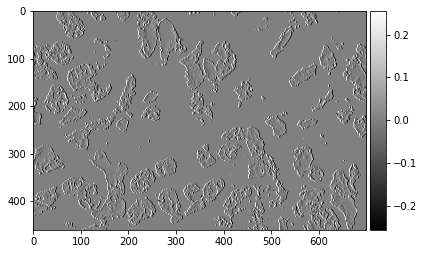

In [11]:
#importing the required libraries
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

#reading the image 
#image = imread('puppy.jpeg',as_gray=True)
image = Mx_train_pre[10]

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

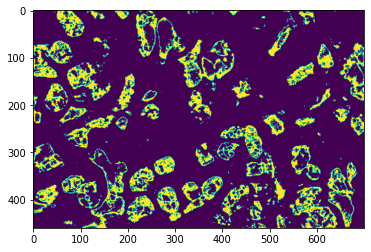

In [20]:
image_spot = Mx_train_pre[10]
image_spot_reshaped = image_spot.reshape((image_spot.shape[0] * image_spot.shape[1]))

# convert to np.float32
Z = np.float32(image_spot_reshaped)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_spot.shape))

#ret, res2 = cv2.threshold(res2, 65, 255, cv2.THRESH_TOZERO_INV)
pyplot.imshow(res2)

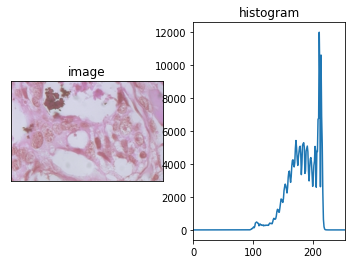

In [13]:
# https://machinelearningprojects.net/histogram-of-a-grayscale-image/
# TO CREATE HISTOGRAM OF AN IMAGE

import numpy as np
img = Mx_train[10]
imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# create the histogram
np.histogram(imgg, bins=10, range=None, normed=None, weights=None, density=None)
pyplot.subplot(1,2,1)
pyplot.imshow(img,cmap='gray')
pyplot.title('image')
pyplot.xticks([])
pyplot.yticks([])
pyplot.subplot(1,2,2)
hist, bin = np.histogram(imgg.ravel(),256,[0,255])
pyplot.xlim([0,255])
pyplot.plot(hist)
pyplot.title('histogram')
pyplot.show()

In [61]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

#image_spot = cv2.imread(image_file)
#gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]

# Find the GLCM
import skimage.feature as feature

# Param:
# source image
# List of pixel pair distance offsets - here 1 in each direction
# List of pixel pair angles in radians
graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

# Find the GLCM properties
contrast = feature.greycoprops(graycom, 'contrast')
dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
homogeneity = feature.greycoprops(graycom, 'homogeneity')
energy = feature.greycoprops(graycom, 'energy')
correlation = feature.greycoprops(graycom, 'correlation')
ASM = feature.greycoprops(graycom, 'ASM')

print("Contrast: {}".format(contrast))
print("Dissimilarity: {}".format(dissimilarity))
print("Homogeneity: {}".format(homogeneity))
print("Energy: {}".format(energy))
print("Correlation: {}".format(correlation))
print("ASM: {}".format(ASM))

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM), axis=0)
features


Contrast: [[154.32583815 195.67699265 160.67779023 192.79370779]]
Dissimilarity: [[3.88473596 4.86461518 4.07825708 4.78147743]]
Homogeneity: [[0.77638199 0.75660537 0.77127179 0.75927347]]
Energy: [[0.73102475 0.72353683 0.72943347 0.72362694]]
Correlation: [[0.74908963 0.68190553 0.73885188 0.68658882]]
ASM: [[0.53439719 0.52350554 0.53207319 0.52363595]]


array([[154.32583815, 195.67699265, 160.67779023, 192.79370779],
       [  3.88473596,   4.86461518,   4.07825708,   4.78147743],
       [  0.77638199,   0.75660537,   0.77127179,   0.75927347],
       [  0.73102475,   0.72353683,   0.72943347,   0.72362694],
       [  0.74908963,   0.68190553,   0.73885188,   0.68658882],
       [  0.53439719,   0.52350554,   0.53207319,   0.52363595]])

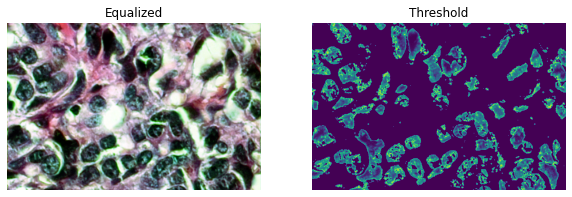

In [ ]:
# https://www.charterglobal.com/what-is-image-binarization-in-ai/
ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
fig = pyplot.figure(figsize=(10, 20))

'''ax1 = fig.add_subplot(2, 3, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 3, 2)
ax2.axis("off")
ax2.title.set_text("BGR2RGB")
'''
ax3 = fig.add_subplot(2, 2, 3)
ax3.axis("off")
ax3.title.set_text("Equalized")

ax4 = fig.add_subplot(2, 2, 4)
ax4.axis("off")
ax4.title.set_text("Threshold")

#ax1.imshow(img, cmap=cmap_val)
#ax2.imshow(imgg, cmap=cmap_val)
ax3.imshow(imgc_eq, cmap=cmap_val)
ax4.imshow(thresh_hold, cmap=cmap_val)
pyplot.imsave(destination + '/BreaKHis_v1/demo.png', thresh_hold)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(Bx_train, By_train)
y_pred = classifier_knn.predict(Bx_test)
print(y_pred)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(By_test, y_pred))